In [26]:
# гол ашиглагдах сангууд
import pandas as pd
import numpy as np 
import os 
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')
from subprocess import check_output


In [31]:
# опен сиви сан дээр ажиллаж эхэлэх хэсэг
import cv2

training_paths = pathlib.Path('/Desktop/data-science-bowl-2018/stage1_train').glob('*images/*.png')
#training_paths = pd.read_csv("/tmp/tmp07wuam09/data/cereal.csv")
#print(training_paths)
training_sort = sorted([x for x in training_paths])
print(training_sort)
impath = training_sort

bgrimg = cv2.imread(str(impath))
#plt.imshow(bgrimg)
#plt.xtricks([])
#plt.ytricks([])
print('zurgiin undes',bgrimg)

[]
zurgiin undes None


In [36]:
#To see the structure of the image let's display one row of the image matrix
print('The first row of the image matrix contains',len(bgrimg[1]),'pixels')
print(bgrimg[1])

TypeError: 'NoneType' object is not subscriptable

In [37]:
#To transfrom the colorspace from BGR to grayscale so as to make things simpler
grayimg = cv2.cvtColor(bgrimg,cv2.COLOR_BGR2GRAY)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [38]:
#To plot the image
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

NameError: name 'grayimg' is not defined

In [39]:


#To understand this further, let's display one entire row of the image matrix
print('The first row of the image matrix contains',len(grayimg[1]),'pixels')
print(grayimg[1])



NameError: name 'grayimg' is not defined

NameError: name 'grayimg' is not defined

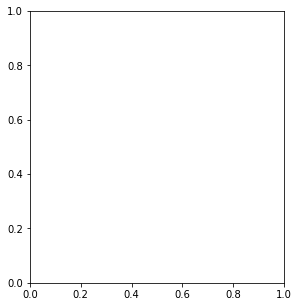

In [40]:
#Okay let's look at the distribution of the intensity values of all the pixels
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(),kde=False)#This is to flatten the matrix and put the intensity values of all the pixels in one single row vector
plt.title('Distribution of intensity values')

#To zoom in on the distribution and see if there is more than one prominent peak 
plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(),kde=False) 
plt.ylim(0,30000) 
plt.title('Distribution of intensity values (Zoomed In)')

In [41]:


from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)



NameError: name 'grayimg' is not defined

In [42]:
mask=np.where(grayimg>thresh_val,1,0)

NameError: name 'grayimg' is not defined

NameError: name 'grayimg' is not defined

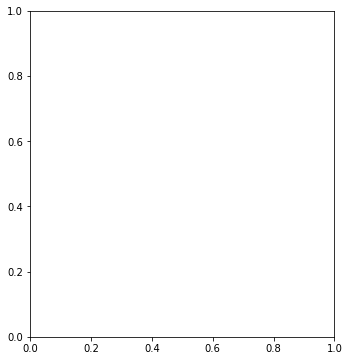

In [43]:
#To plot the original image and mask side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask')

In [44]:
#Let's see if K-Means does a good job on this data 
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2) #2 as we're still trying to seperate the lighter coloured nuclei from the darker coloured background 
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(kmeans.labels_.reshape(520,696),cmap='magma')
plt.title('K-Means')

plt.subplot(1,2,2)
plt.imshow(maskimg, cmap='viridis')
plt.title('Mask with Otsu Seperation')

NameError: name 'grayimg' is not defined

In [45]:
#To check if there's any difference
sum((kmeans.labels_.reshape(520,696)==mask).flatten())/(mask.shape[0]*mask.shape[1])

AttributeError: 'KMeans' object has no attribute 'labels_'

In [46]:


from scipy import ndimage

#To see this at a matrix level
matrix = np.array([[0,0,1,1,1,1],
                  [0,0,0,0,1,1],
                  [1,1,0,1,1,1],
                  [1,1,0,1,1,1]])
matrix


array([[0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1]])

In [47]:


#Applying the ndimage.label function
ndimage.label(matrix)



(array([[0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1],
        [2, 2, 0, 1, 1, 1],
        [2, 2, 0, 1, 1, 1]], dtype=int32), 2)

In [48]:
labels,nlabels=ndimage.label(mask)
print('There are',nlabels,'distinct nuclei in the mask.')

NameError: name 'mask' is not defined

In [49]:
#Since we need to create a seperate mask for every nucelus, let's store the masks in an iterable like a list 
label_array=[]
#We need to iterate from 1 as ndimage.label encodes every object starting from number 1
for i in range(1,nlabels+1):
    label_mask = np.where(labels==i,1,0)
    label_array.append(label_mask)
#To see one such mask
label_array[68]

NameError: name 'nlabels' is not defined

In [50]:
#Function for rle encoding
def rle(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

In [51]:
#Running RLE on the last label_mask in label_array gives us 
rle(label_mask)

NameError: name 'label_mask' is not defined

In [52]:
#To take a look at the different parts
im_path.parts

NameError: name 'im_path' is not defined

In [53]:
#Now defining a function that is applicable to all images
def basic(im_path):
    #Reading the image
    im_id=im_path.parts[-3] #To extract the image ID
    bgr = cv2.imread(str(im_path)) #Reading it in OpenCV
    gray = cv2.cvtColor(bgr,cv2.COLOR_BGR2GRAY) #Converting everything to grayscale from BGR

    #To remove the background
    thresh_val = threshold_otsu(gray) #Using Otsu's method to seperate the foreground objects from the background
    mask = np.where(gray > thresh_val, 1, 0) #Coding objects with intensity values higher than background as 1
    
    #Extracting connected objects
    test_rle=pd.DataFrame()
    labels, nlabels = ndimage.label(mask) #labels gives us the label of the different objects in every image starting from 1 and nlabels gives us the total number of objects in every image
    for i in range(1,nlabels+1): #Iterating through every object/label
        label_mask = np.where(labels==i,1,0) #Individual masks for every nucleus
        RLE = rle(label_mask) #RLE for every mask
        solution = pd.Series({'ImageId': im_id, 'EncodedPixels': RLE})
        test_rle = test_rle.append(solution, ignore_index=True)
    
    #Return the dataframe
    return(test_rle)

In [54]:


#Defining a function that takes a list of image paths (pathlib.Path objects), analyzes each and returns a submission ready DataFrame
def list_of_images(im_path_list):
    all_df = pd.DataFrame()
    for im_path in im_path_list: #We'll use this for the test images
        im_df = basic(im_path) #Creating one dataframe for every image 
        all_df = all_df.append(im_df, ignore_index=True) #Appending all these dataframes
    
    #Returing the submission ready dataframe
    return (all_df)



In [55]:


#Final submission
test_images = pathlib.Path('../input/stage1_test/').glob('*/images/*.png')
basic_solution = list_of_images(list(test_images))
basic_solution.to_csv('basic_solution.csv', index=None)



In [56]:
#cv2.Sobel arguments - the image, output depth, order of derivative of x, order of derivative of y, kernel/filter matrix size
sobelx = cv2.Sobel(grayimg,int(cv2.CV_64F),1,0,ksize=3) #ksize=3 means we'll be using the 3x3 Sobel filter
sobely = cv2.Sobel(grayimg,int(cv2.CV_64F),0,1,ksize=3)

#To plot the vertical and horizontal edge detectors side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X (vertical edges)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(sobely,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Sobel Y (horizontal edges)')

NameError: name 'grayimg' is not defined

NameError: name 'grayimg' is not defined

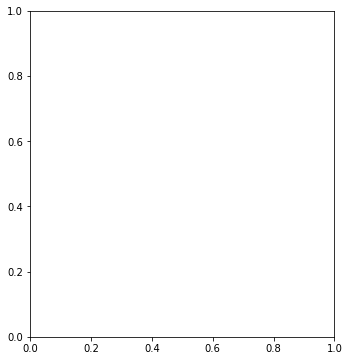

In [57]:
#Plotting the original image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original image')

#Now to combine the 2 sobel filters
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
plt.subplot(1,2,2)
plt.imshow(sobel,cmap='gray')
plt.title('Sobel Filter')

NameError: name 'grayimg' is not defined

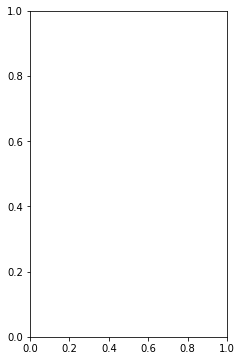

In [58]:


#To highlight the problem areas
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(grayimg[350:450,485:530],cmap='gray')
plt.title('Original image (zoomed in)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(sobel[350:450,485:530],cmap='gray')
plt.title('Sobel Filter (zoomed in)')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(maskimg[350:450,485:530], cmap='gray')
plt.title('Otsu/K-Means (zoomed in)')
plt.xticks([])
plt.yticks([])



NameError: name 'grayimg' is not defined

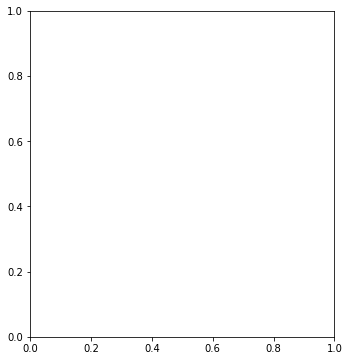

In [59]:


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(grayimg,cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

#Let's see how the Canny Edge Detector does on the image
plt.subplot(1,2,2)
canny = cv2.Canny(grayimg,0,21)
plt.imshow(canny,cmap='gray')
plt.title('Canny Edge Detection')
plt.xticks([])
plt.yticks([])



In [60]:


#Using contouring to create the masks
canny_cont=cv2.findContours(canny,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[1] #Using an approximation function to obtain the contour points and retreiving only the external contours

#To show the contour points
plt.figure(figsize=(14,8))
plt.imshow(canny,cmap='gray')
plt.title('Canny Edge Detection with contours')
plt.xticks([])
plt.yticks([])

for i in (range(len(canny_cont))):
    plt.scatter(canny_cont[i].flatten().reshape(len(canny_cont[i]),2)[:,0],
         canny_cont[i].flatten().reshape(len(canny_cont[i]),2)[:,1])



NameError: name 'canny' is not defined